
Dataset Shape: (418, 11)

Columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

First 5 rows:
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  

Missing Values:
Pass

/tmp/ipython-input-117504198.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-117504198.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

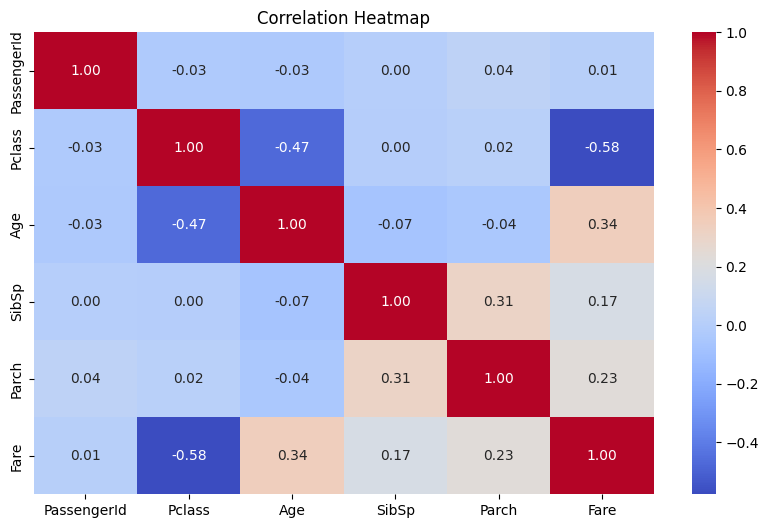

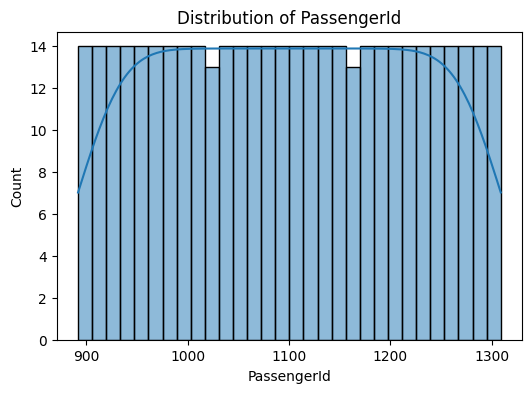

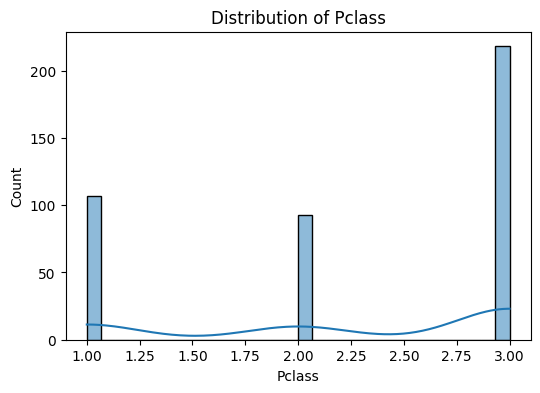

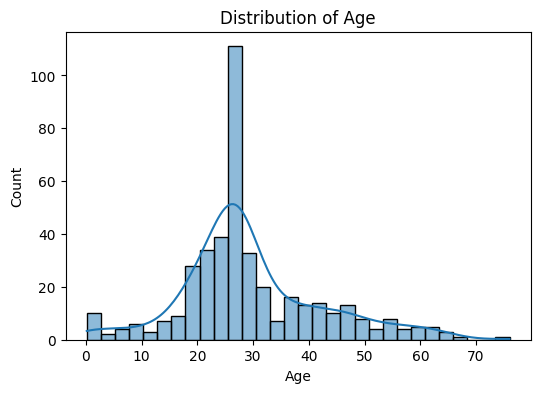

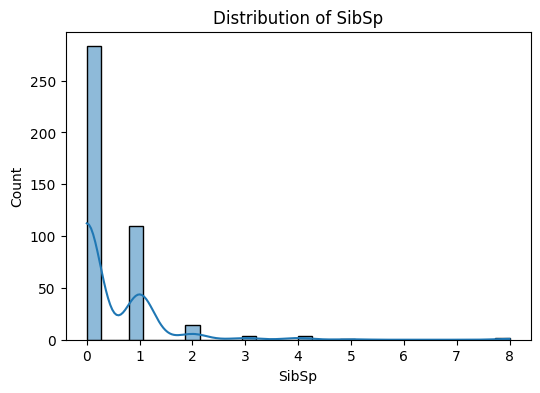

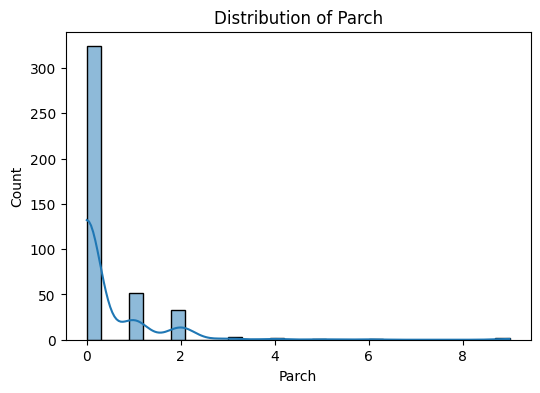

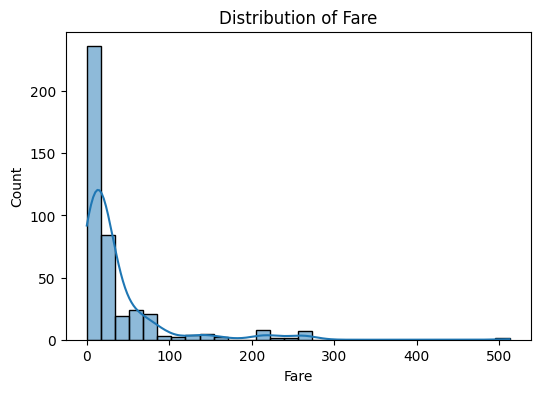

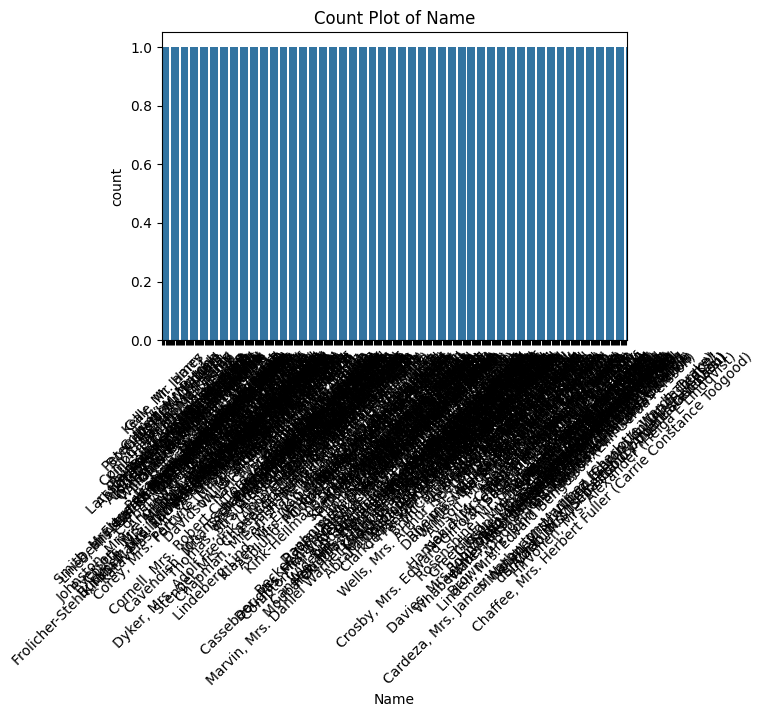

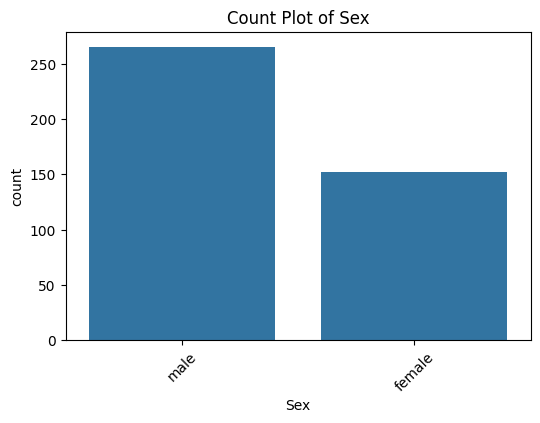

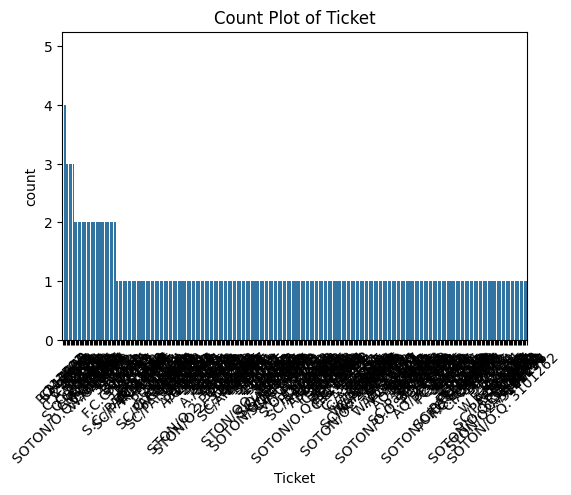

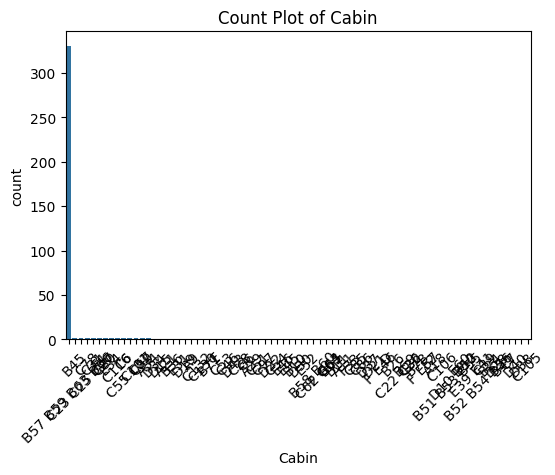

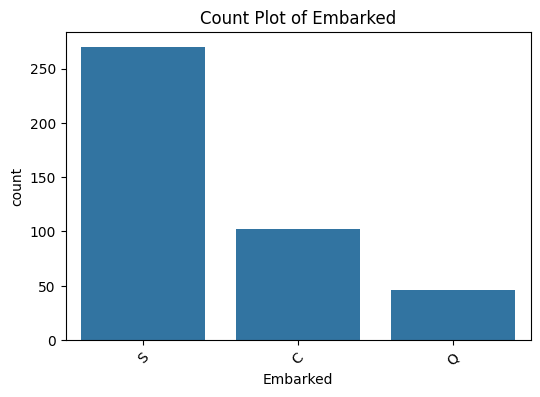

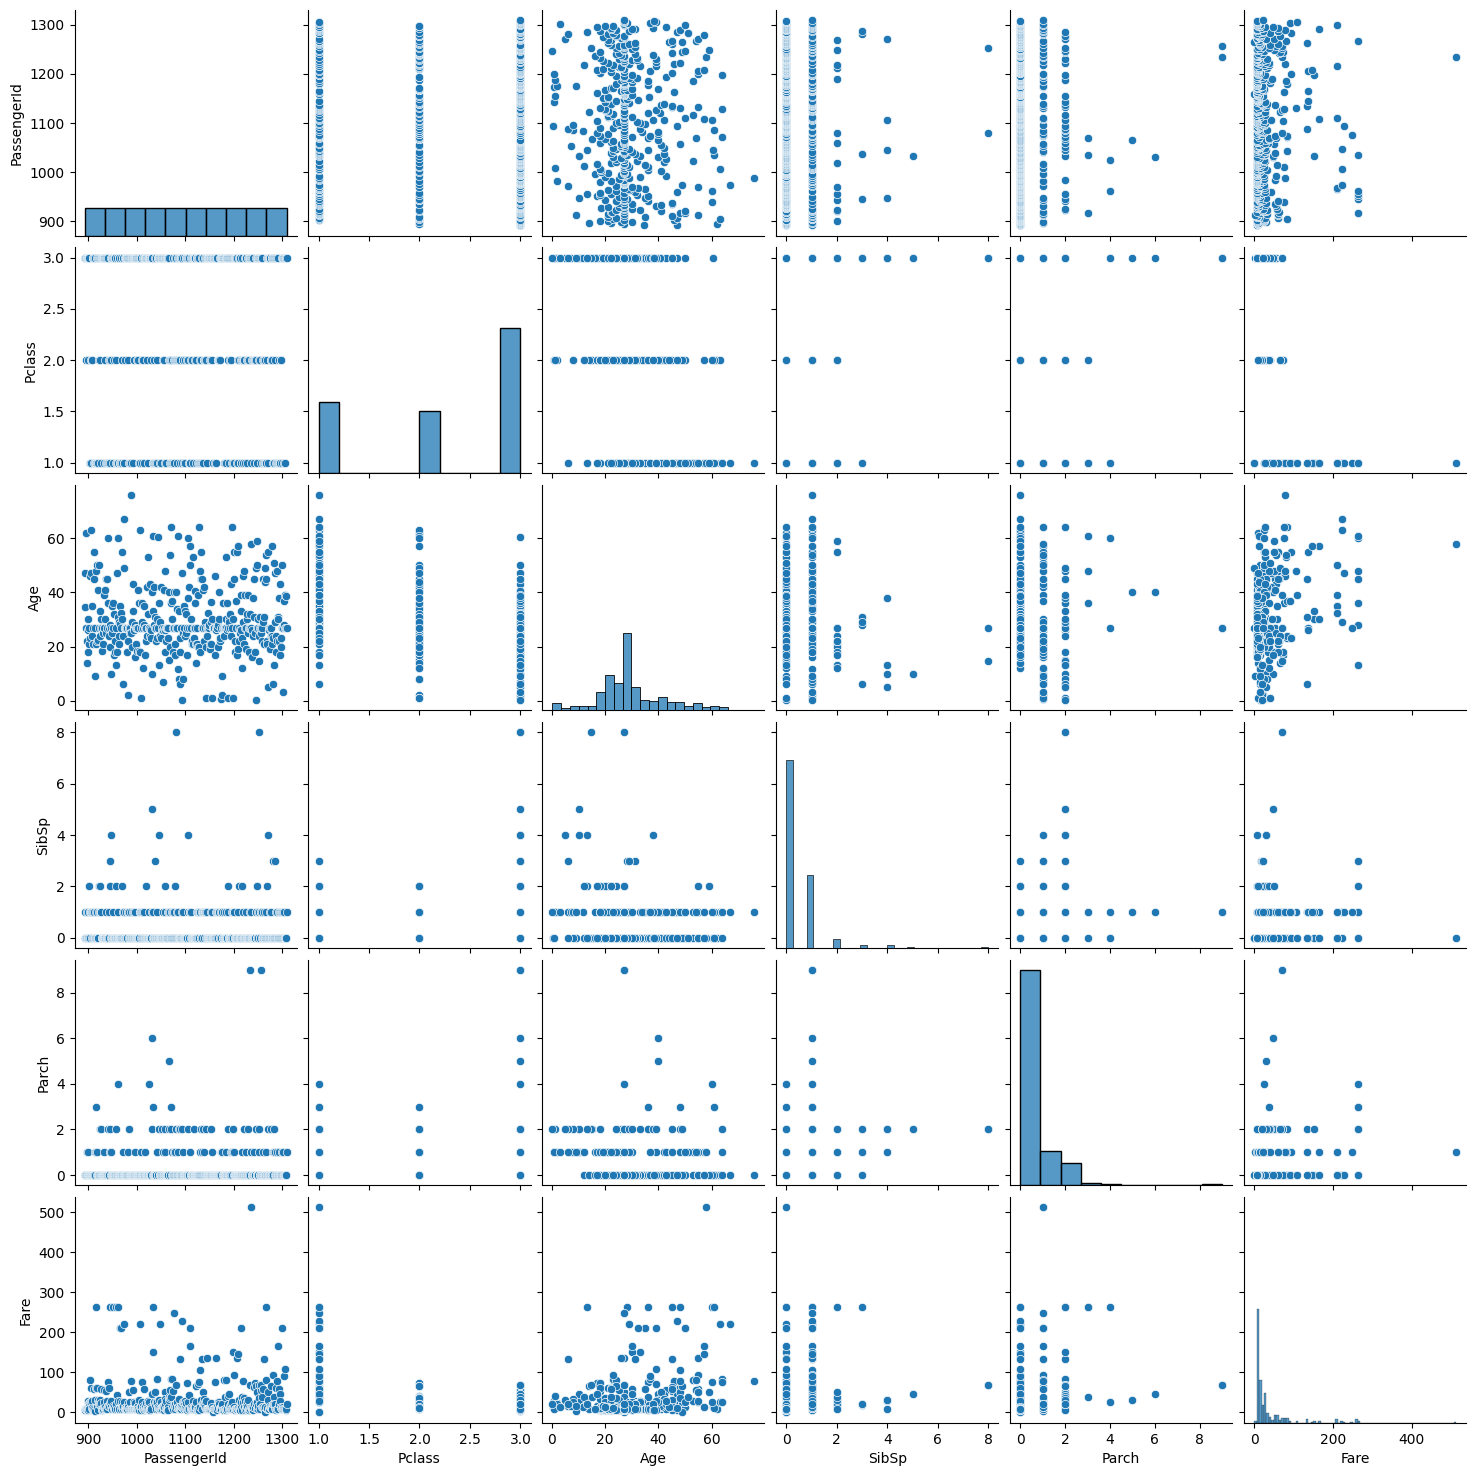

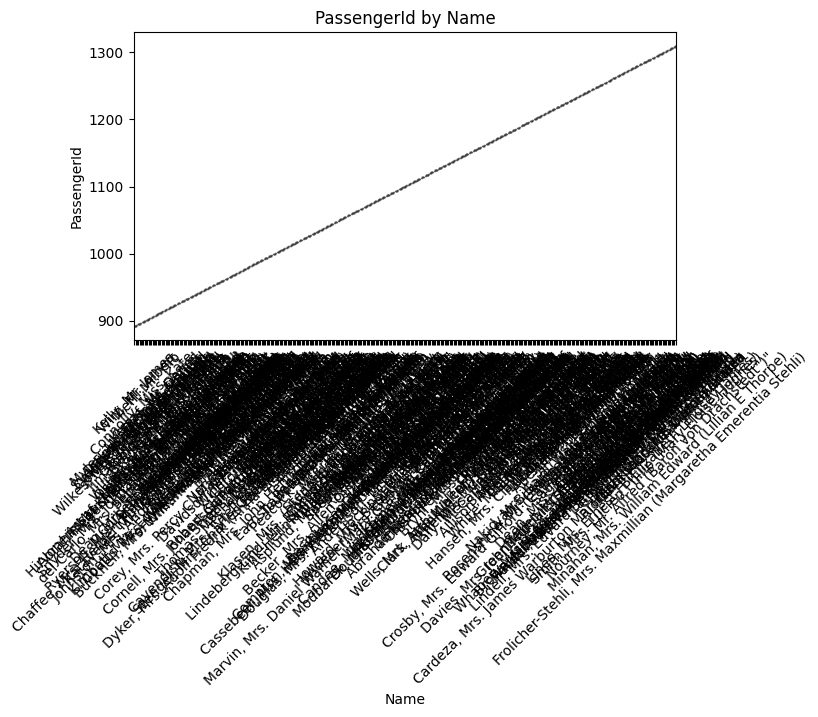

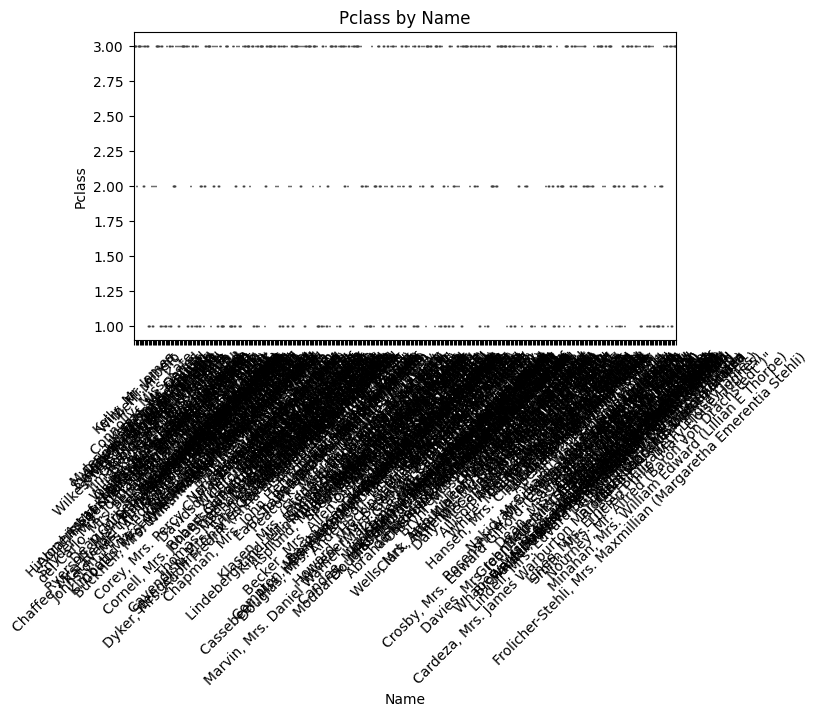

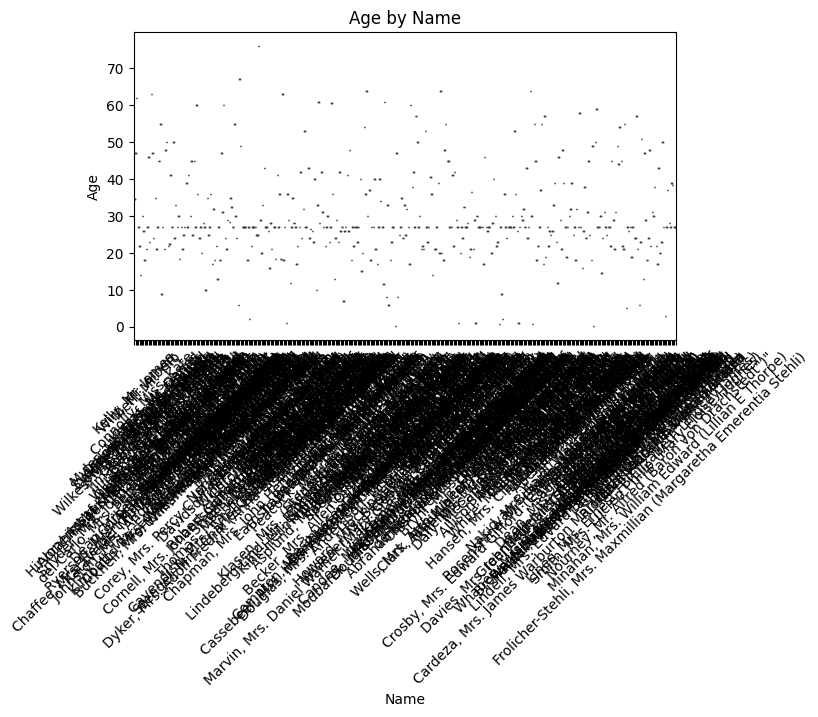

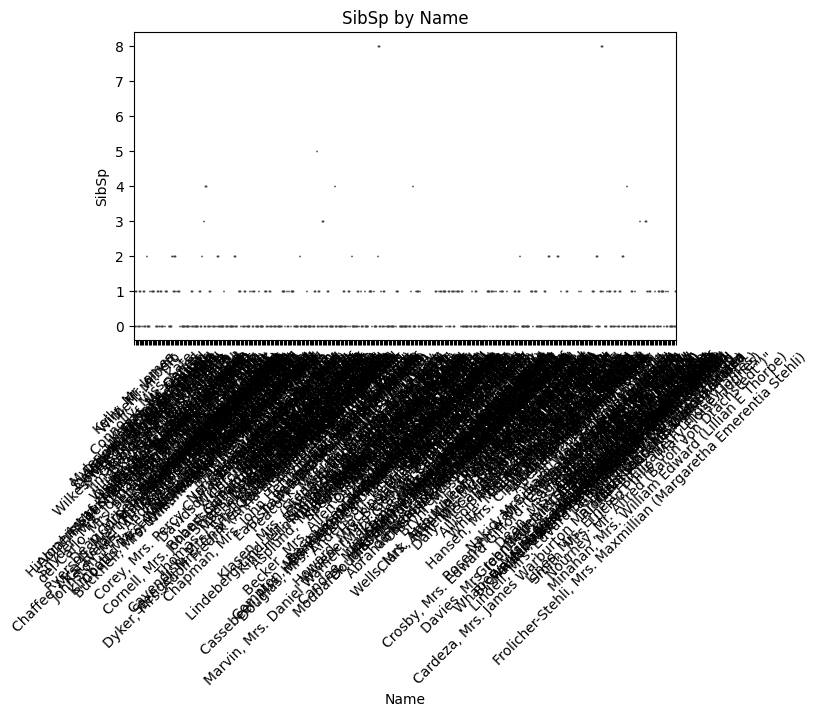

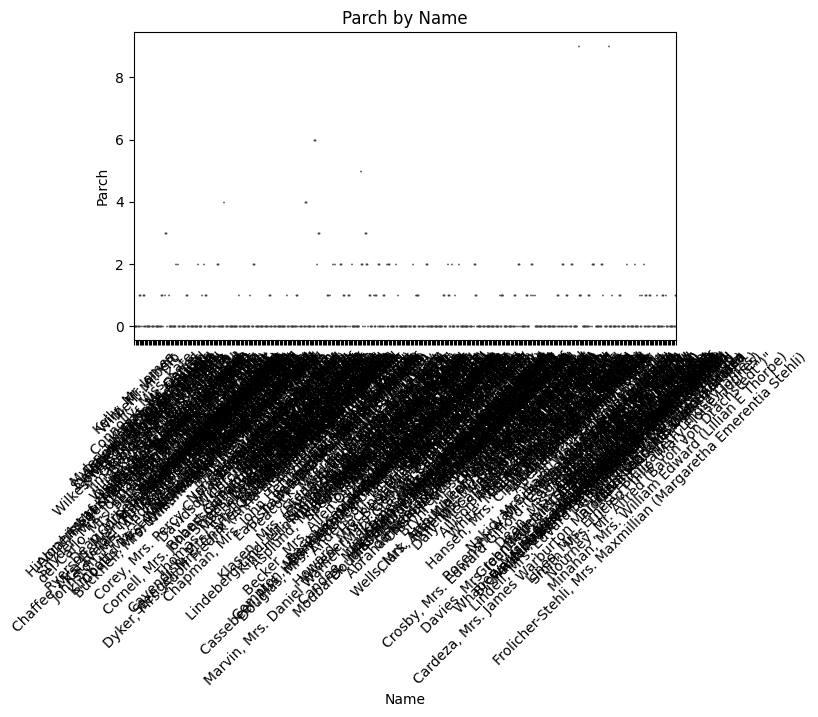

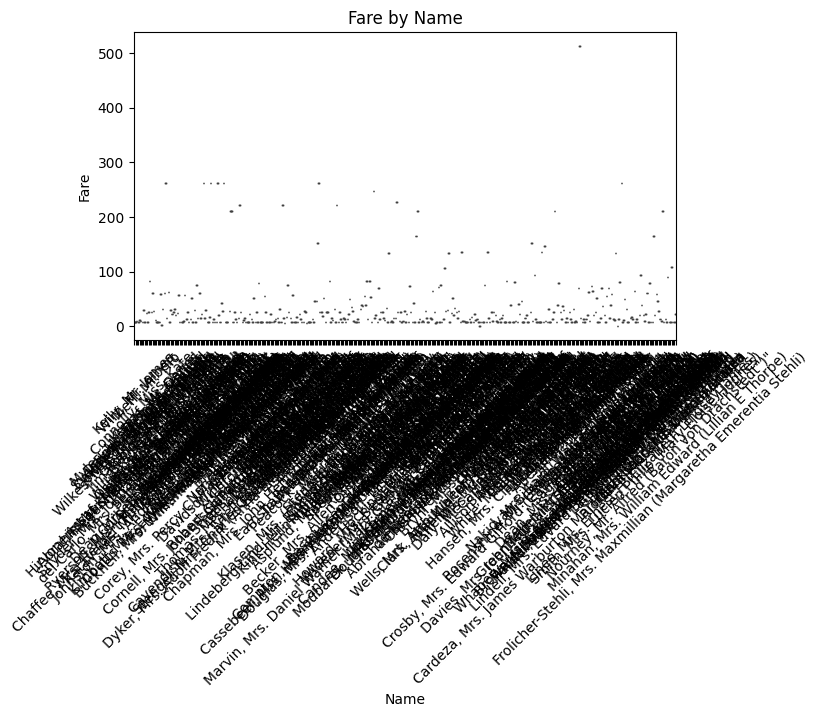

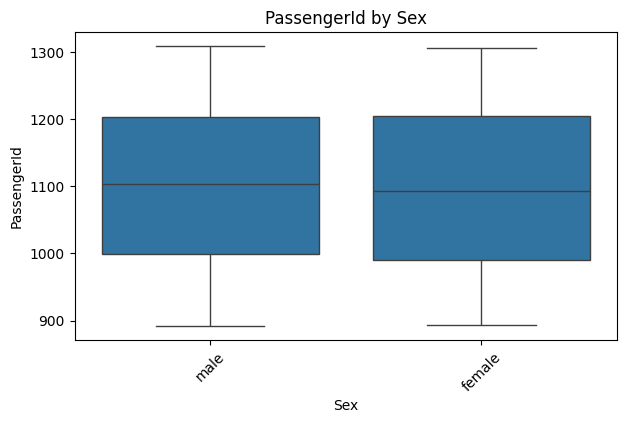

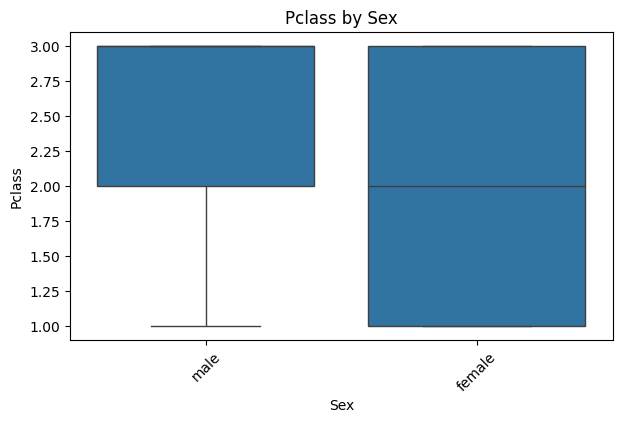

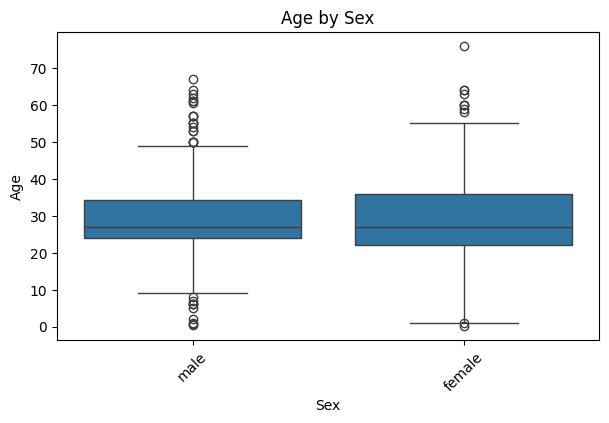

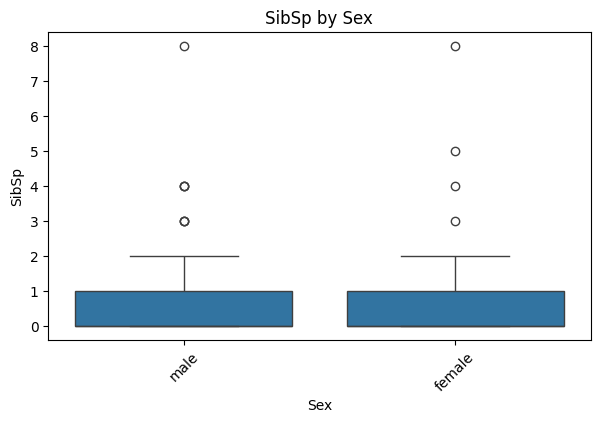

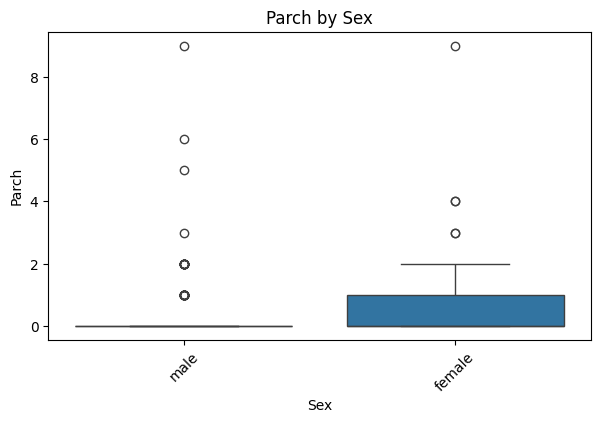

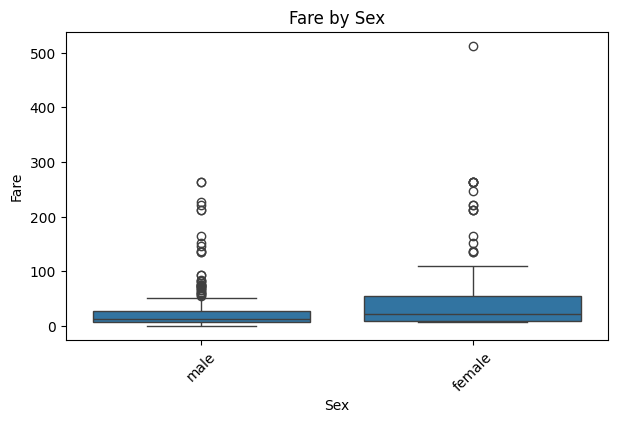

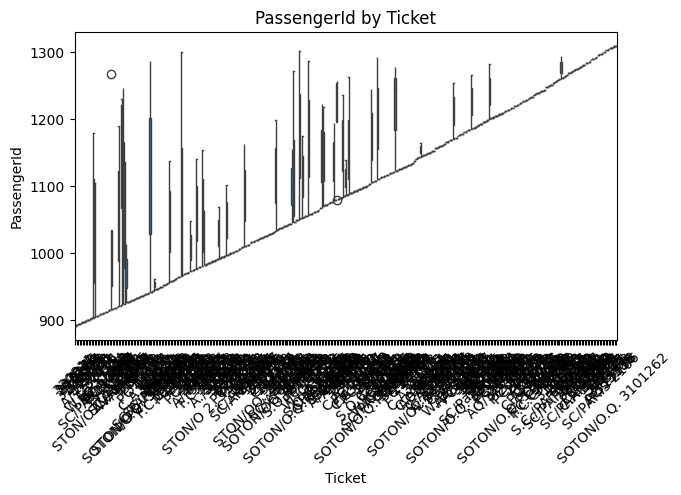

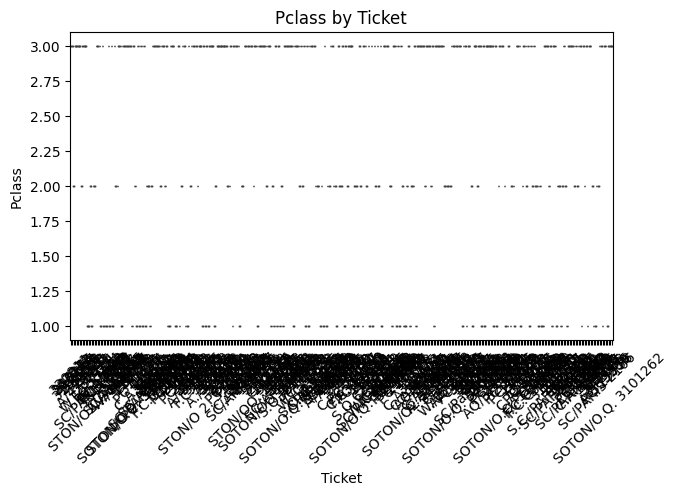

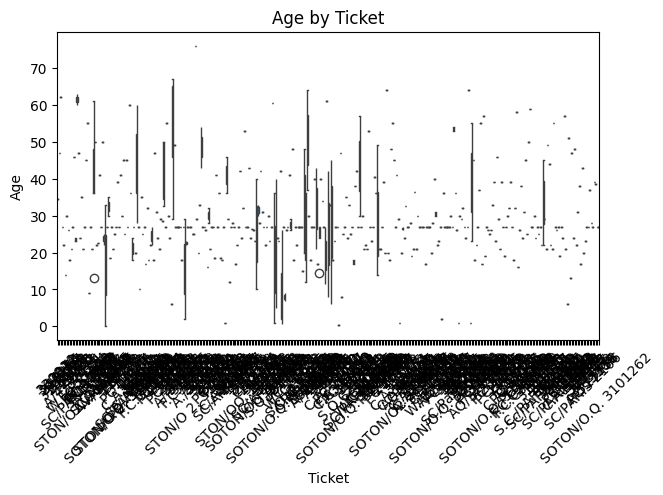

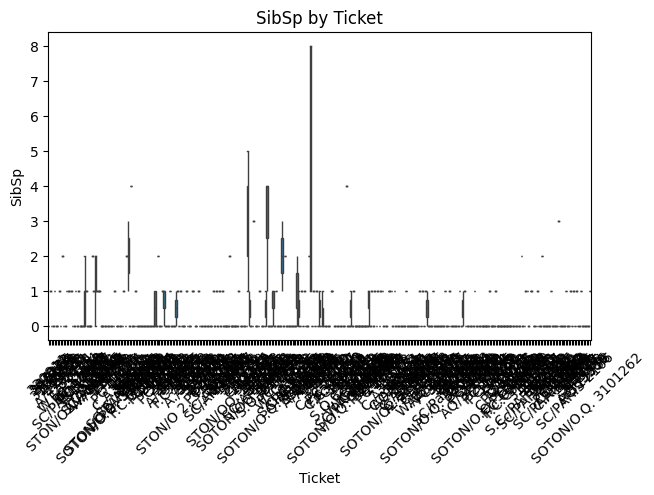

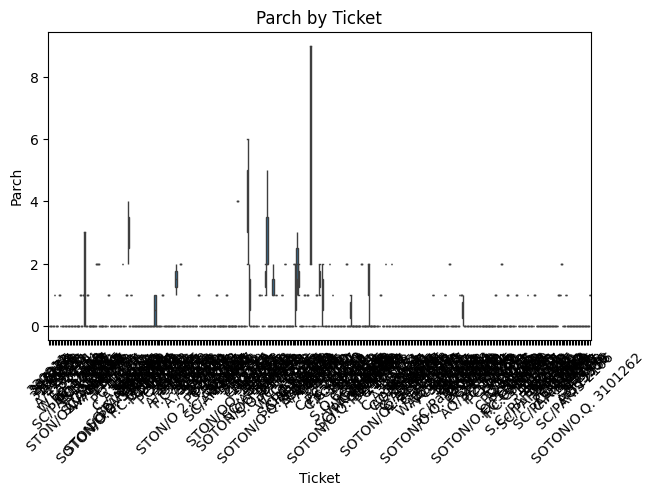

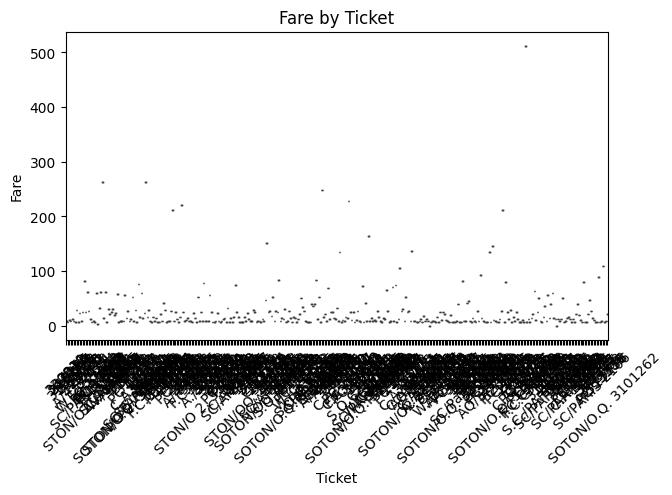

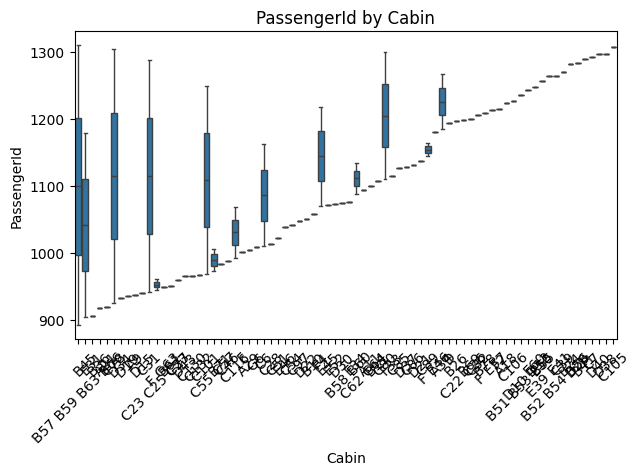

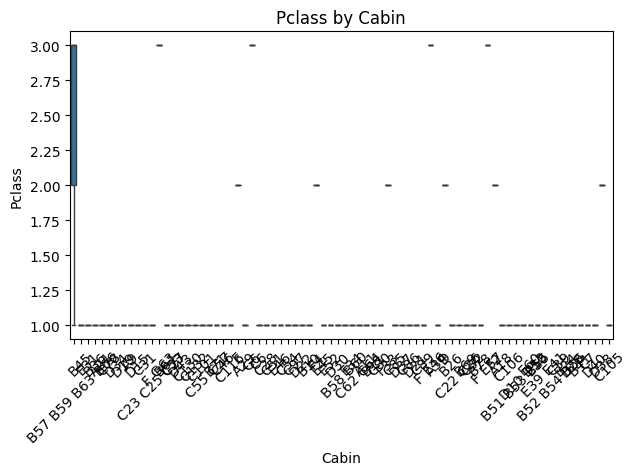

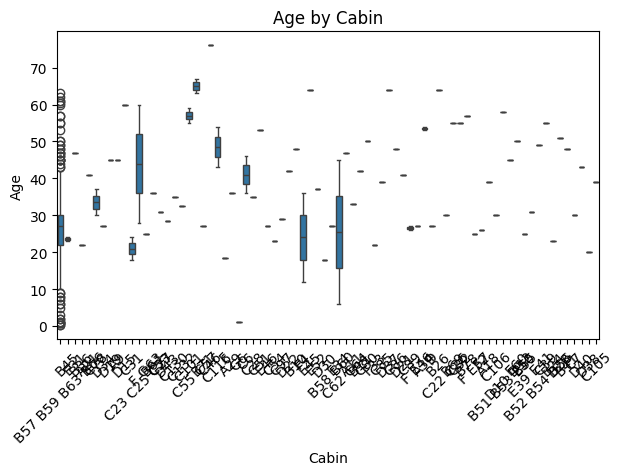

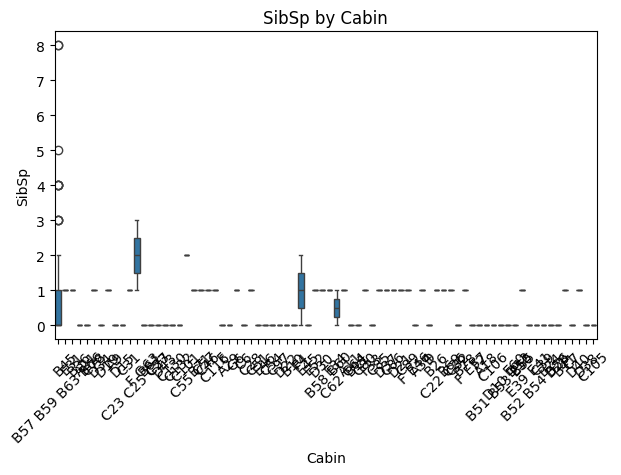

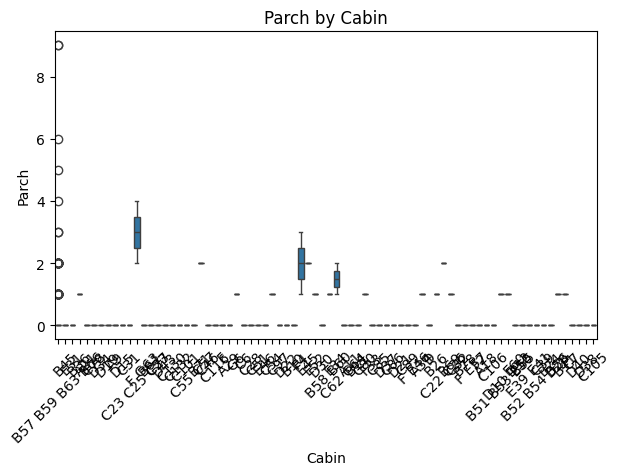

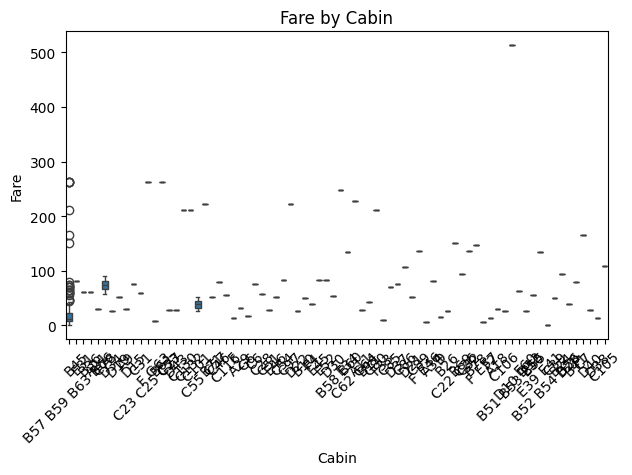

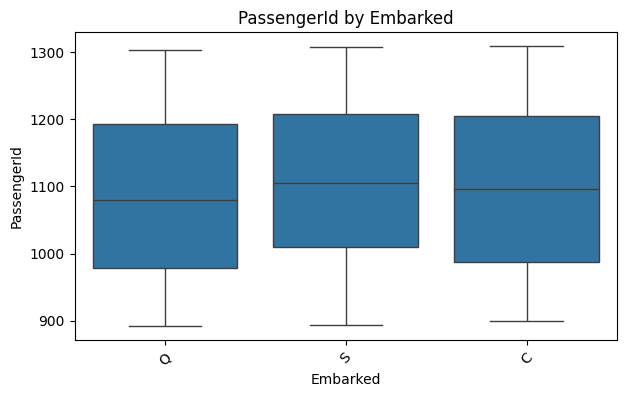

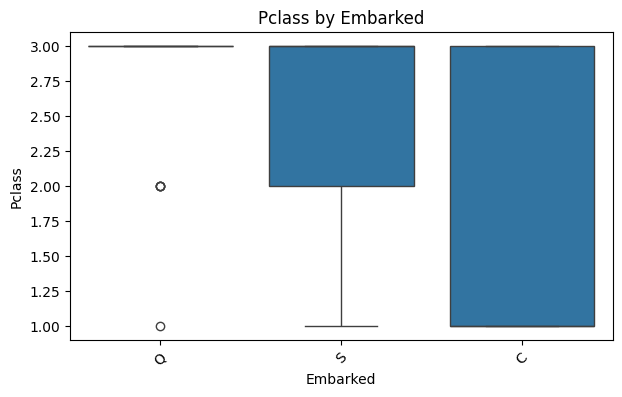

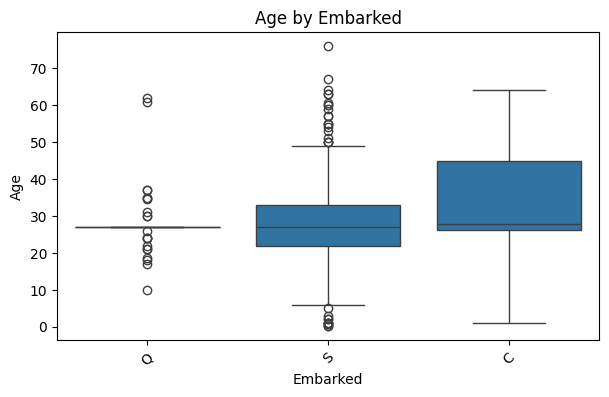

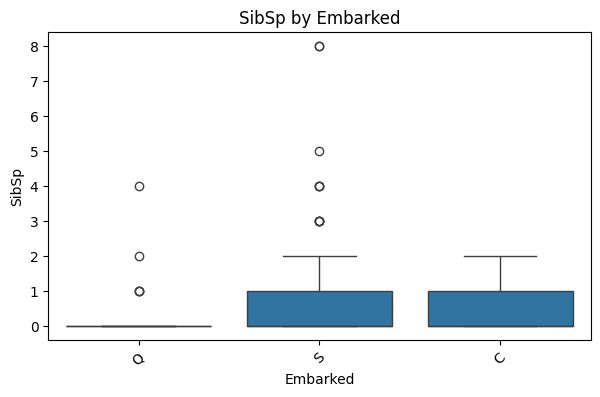

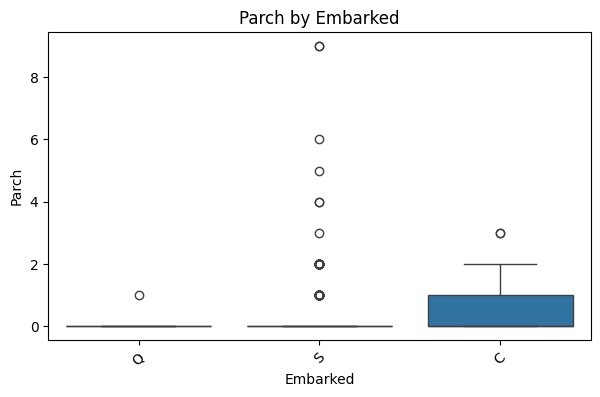

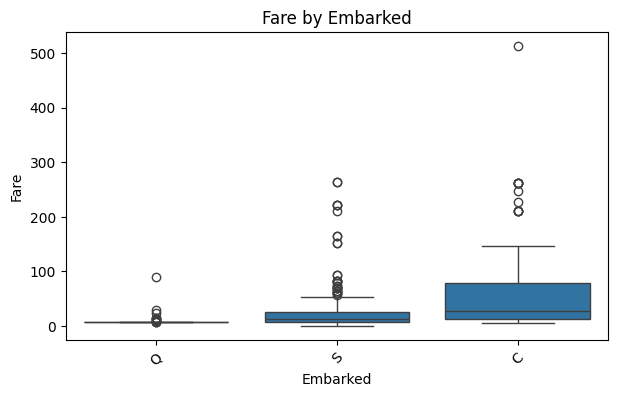

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# 1. Load Dataset
# ==============================
file_path = "test.csv"  # your uploaded dataset
df = pd.read_csv(file_path)

# Basic info
print("\nDataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

# ==============================
# 2. Data Cleaning
# ==============================
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill numeric NaN with median, categorical with mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# ==============================
# 3. Exploratory Data Analysis
# ==============================

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Correlation heatmap (only for numeric features)
num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of numeric columns
num_cols = num_df.columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Count plots for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# ==============================
# 4. Relationship Analysis
# ==============================

# Pairplot for numerical relationships (only if >1 numeric columns)
if len(num_cols) > 1:
    sns.pairplot(df[num_cols])
    plt.show()

# Boxplot for categorical vs numeric features
for col in cat_cols:
    for num in num_cols:
        plt.figure(figsize=(7,4))
        sns.boxplot(data=df, x=col, y=num)
        plt.title(f"{num} by {col}")
        plt.xticks(rotation=45)
        plt.show()
